In [1]:
import tensorflow as tf

# importing different elements (datasets, layers, etc.) to build the CNN model
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D , Dropout


In [22]:
from tensorflow.keras.applications import ResNet50,VGG19 

In [3]:

# Loading the dataset - Train, test
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
import matplotlib.pyplot as plt

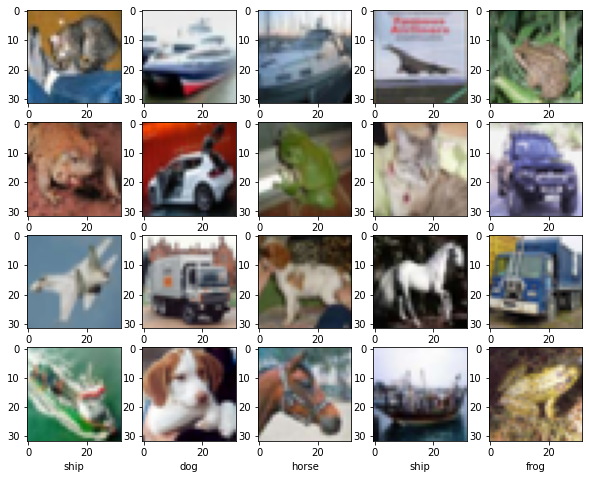

In [7]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.imshow(test_images[i],cmap=plt.cm.binary)
  plt.grid(False)
  plt.xlabel(class_names[test_labels[i][0]])
  #plt.colorbar()
plt.show()


In [8]:
model=models.Sequential()

include_top=false means top 3 layers are muted or excluded

In [9]:
model.add(VGG19(include_top=False,weights='imagenet',input_tensor=None,input_shape=(32,32,3)))


80150528/80134624 [==============================] - 1s 0us/step


In [10]:

model.add(Flatten())
model.add(Dense(10,activation=('softmax')))

FREEZING VGG19 BY SETTING trainable=false

In [ ]:
model.layers[0].trainable=False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                5130      
Total params: 20,029,514
Trainable params: 5,130
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
sgd=tf.keras.optimizers.SGD(lr=.005,momentum=.9,nesterov=False)
model.compile(optimizer=sgd,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(train_images,train_labels,epochs=10,batch_size=16,validation_data=(test_images,test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


3125/3125 [==============================] - 94s 21ms/step - loss: 1.5335 - accuracy: 0.4612 - val_loss: 1.4307 - val_accuracy: 0.4953
Epoch 2/10
3125/3125 [==============================] - 76s 24ms/step - loss: 1.3780 - accuracy: 0.5169 - val_loss: 1.3633 - val_accuracy: 0.5228
Epoch 3/10
3125/3125 [==============================] - 71s 23ms/step - loss: 1.3311 - accuracy: 0.5333 - val_loss: 1.3299 - val_accuracy: 0.5410
Epoch 4/10
3125/3125 [==============================] - 73s 23ms/step - loss: 1.3092 - accuracy: 0.5432 - val_loss: 1.3332 - val_accuracy: 0.5296
Epoch 5/10
3125/3125 [==============================] - 68s 22ms/step - loss: 1.2907 - accuracy: 0.5526 - val_loss: 1.3180 - val_accuracy: 0.5337
Epoch 6/10
3125/3125 [==============================] - 66s 21ms/step - loss: 1.2780 - accuracy: 0.5531 - val_loss: 1.2856 - val_accuracy: 0.5553
Epoch 7/10
3125/3125 [==============================] - 67s 21ms/step - loss: 1.2716 - accuracy: 0.5571 - val_loss: 1.2949 - val_accura

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print(test_acc)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


313/313 - 7s - loss: 1.3105 - accuracy: 0.5427
0.5426999926567078


making vgg19 to updatde weights and transfer learning is done here


In [ ]:
model.layers[0].trainable=True
sgd=tf.keras.optimizers.SGD(learning_rate=.0001,momentum=.9,nesterov=False)
model.compile(optimizer=sgd,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(train_images,train_labels,epochs=10,batch_size=16,validation_data=(test_images,test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


3125/3125 [==============================] - 212s 67ms/step - loss: 0.8312 - accuracy: 0.7106 - val_loss: 0.6594 - val_accuracy: 0.7730
Epoch 2/10
3125/3125 [==============================] - 209s 67ms/step - loss: 0.5630 - accuracy: 0.8039 - val_loss: 0.5901 - val_accuracy: 0.7988
Epoch 3/10
3125/3125 [==============================] - 210s 67ms/step - loss: 0.4552 - accuracy: 0.8401 - val_loss: 0.5515 - val_accuracy: 0.8109
Epoch 4/10
3125/3125 [==============================] - 209s 67ms/step - loss: 0.3776 - accuracy: 0.8659 - val_loss: 0.5255 - val_accuracy: 0.8252
Epoch 5/10
3125/3125 [==============================] - 209s 67ms/step - loss: 0.3141 - accuracy: 0.8883 - val_loss: 0.5222 - val_accuracy: 0.8239
Epoch 6/10
3125/3125 [==============================] - 209s 67ms/step - loss: 0.2581 - accuracy: 0.9088 - val_loss: 0.4926 - val_accuracy: 0.8403
Epoch 7/10
3125/3125 [==============================] - 209s 67ms/step - loss: 0.2119 - accuracy: 0.9256 - val_loss: 0.5422 - val

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


313/313 [==============================] - 8s 25ms/step - loss: 0.6585 - accuracy: 0.8287


In [ ]:
print(test_acc)

0.8287000060081482


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                5130      
Total params: 20,029,514
Trainable params: 20,029,514
Non-trainable params: 0
_________________________________________________________________


In [11]:
m=models.Sequential()
m.add(VGG19(include_top=False,weights='imagenet',input_tensor=None,input_shape=(32,32,3)))


In [12]:
m.add(Flatten())
m.add(Dense(1024,activation=('relu'),input_dim=512))
m.add(Dense(512,activation=('relu')))
m.add(Dense(256,activation=('relu')))
m.add(Dropout(.3))
m.add(Dense(128,activation=('relu')))
m.add(Dropout(.2))
m.add(Dense(10,activation=('softmax')))

In [13]:
m.layers[0].traniable=False
m.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [14]:
sgd=tf.keras.optimizers.SGD(learning_rate=.005,momentum=.9,nesterov=False)
m.compile(optimizer=sgd,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=m.fit(train_images,train_labels,epochs=10,batch_size=16,validation_data=(test_images,test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


3125/3125 [==============================] - 252s 71ms/step - loss: 1.4601 - accuracy: 0.4635 - val_loss: 1.0923 - val_accuracy: 0.6316
Epoch 2/10
3125/3125 [==============================] - 221s 71ms/step - loss: 0.9467 - accuracy: 0.6945 - val_loss: 0.7932 - val_accuracy: 0.7561
Epoch 3/10
3125/3125 [==============================] - 221s 71ms/step - loss: 0.7456 - accuracy: 0.7645 - val_loss: 0.8503 - val_accuracy: 0.7357
Epoch 4/10
3125/3125 [==============================] - 221s 71ms/step - loss: 0.6181 - accuracy: 0.8071 - val_loss: 0.6675 - val_accuracy: 0.7884
Epoch 5/10
3125/3125 [==============================] - 220s 70ms/step - loss: 0.5272 - accuracy: 0.8344 - val_loss: 0.6500 - val_accuracy: 0.8013
Epoch 6/10
3125/3125 [==============================] - 221s 71ms/step - loss: 0.4544 - accuracy: 0.8588 - val_loss: 0.5579 - val_accuracy: 0.8214
Epoch 7/10
3125/3125 [==============================] - 221s 71ms/step - loss: 0.3807 - accuracy: 0.8810 - val_loss: 0.6041 - val

In [26]:
test_loss,test_acc=m.evaluate(test_images,test_labels,verbose=2)
print(test_acc)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


313/313 - 7s - loss: 0.5796 - accuracy: 0.8726
0.8726000189781189


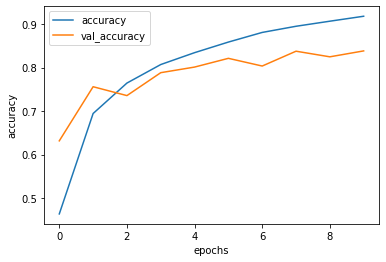

In [15]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [16]:
m.layers[0].trainable=True
sgd=tf.keras.optimizers.SGD(learning_rate=.0001,momentum=.9,nesterov=False)
m.compile(optimizer=sgd,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=m.fit(train_images,train_labels,epochs=5,batch_size=16,validation_data=(test_images,test_labels))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


3125/3125 [==============================] - 222s 71ms/step - loss: 0.1222 - accuracy: 0.9628 - val_loss: 0.5114 - val_accuracy: 0.8660
Epoch 2/5
3125/3125 [==============================] - 220s 70ms/step - loss: 0.0909 - accuracy: 0.9724 - val_loss: 0.5280 - val_accuracy: 0.8686
Epoch 3/5
3125/3125 [==============================] - 220s 70ms/step - loss: 0.0776 - accuracy: 0.9765 - val_loss: 0.5435 - val_accuracy: 0.8705
Epoch 4/5
3125/3125 [==============================] - 220s 70ms/step - loss: 0.0687 - accuracy: 0.9795 - val_loss: 0.5609 - val_accuracy: 0.8720
Epoch 5/5
3125/3125 [==============================] - 220s 70ms/step - loss: 0.0615 - accuracy: 0.9815 - val_loss: 0.5796 - val_accuracy: 0.8726


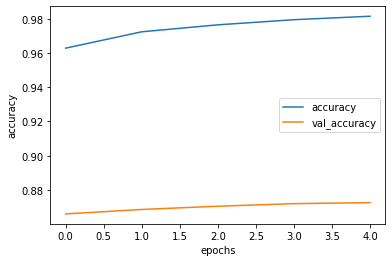

In [17]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

using **resnet50** **bold text**

In [23]:
r=models.Sequential()
r.add(ResNet50(include_top=False,weights='imagenet',input_tensor=None,input_shape=(32,32,3)))
r.add(Flatten())
r.add(Dense(10,activation="softmax"))

94781440/94765736 [==============================] - 1s 0us/step


In [24]:
r.layers[0].trainable=True
sgd=tf.keras.optimizers.SGD(learning_rate=.0001,momentum=.9,nesterov=False)
r.compile(optimizer=sgd,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
his=r.fit(train_images,train_labels,epochs=5,batch_size=16,validation_data=(test_images,test_labels))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


3125/3125 [==============================] - 288s 90ms/step - loss: 1.5386 - accuracy: 0.4841 - val_loss: 1.0797 - val_accuracy: 0.6340
Epoch 2/5
3125/3125 [==============================] - 280s 90ms/step - loss: 1.0711 - accuracy: 0.6332 - val_loss: 0.9272 - val_accuracy: 0.6879
Epoch 3/5
3125/3125 [==============================] - 280s 90ms/step - loss: 0.8908 - accuracy: 0.6932 - val_loss: 0.8463 - val_accuracy: 0.7242
Epoch 4/5
3125/3125 [==============================] - 280s 90ms/step - loss: 0.7803 - accuracy: 0.7324 - val_loss: 0.7065 - val_accuracy: 0.7609
Epoch 5/5
3125/3125 [==============================] - 280s 90ms/step - loss: 0.6962 - accuracy: 0.7601 - val_loss: 0.7041 - val_accuracy: 0.7656


In [25]:
test_loss,test_acc=r.evaluate(test_images,test_labels,verbose=2)
print(test_acc)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


313/313 - 9s - loss: 0.7041 - accuracy: 0.7656
0.7656000256538391


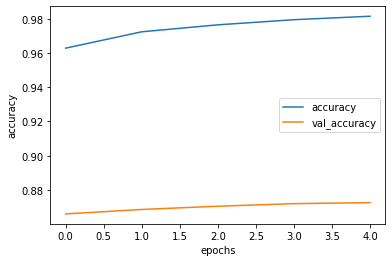

In [27]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()